# 基础知识

In [ ]:
import torch
import random
import numpy as np 
from torch.utils import data
from d2l import torch as d2l
from torch import nn


## 自动求导

In [69]:
#储存x梯度
x=torch.arange(4.,requires_grad=True)
print(x,x.grad)
# 计算Y
y=2*torch.dot(x,x)
y

tensor([0., 1., 2., 3.], requires_grad=True) None


tensor(28., grad_fn=<MulBackward0>)

In [70]:
# 反向传播计算Y关于X每个分量的梯度
y.backward()
x.grad
x.grad == 4*x

tensor([True, True, True, True])

In [71]:
# 默认会累计梯度，估需要清除之前的梯度值
x.grad.zero_()
y=x.sum()
y.backward()
x.grad


tensor([1., 1., 1., 1.])

## 线性回归

### 基础实现

In [72]:
%matplotlib inline

features: tensor([ 1.0540, -0.8379]) 
label: tensor([8.6286])


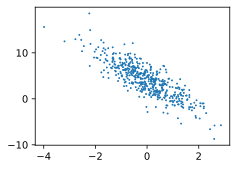

In [94]:
# 构造人造数据集
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w= torch.tensor([2.,-3.])
true_b=4.
features,labels=synthetic_data(true_w,true_b,500)

print('features:',features[0],'\nlabel:',labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [ ]:
# 定义函数接收输入，生成batch_size的小批量
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:
                 min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break
    

In [ ]:
# 定义初始化模型参数
w=torch.normal(0,0.01,(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
w,b
#定义模型
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

#定义损失函数
def squared_loss(y_hat,y):
    """均方损失"""
    return(y_hat-y.reshape(y_hat.shape))**2/2

#定义优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()



In [ ]:
# 训练过程
lr=0.02
num_epochs=10
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):.9f}')

In [ ]:
# 评估
print(f'w的误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的误差:{true_b-b}')

In [ ]:
w,b

### 简洁实现

In [116]:
true_b,true_w

(4.0, tensor([ 2., -3.]))

In [134]:
features,labels=d2l.synthetic_data(true_w,true_b,1000)
def load_array(data_array,batch_size,is_train=True):
    """构造一个PYtorch数据迭代器"""
    dataset=data.TensorDataset(*data_array)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

print(f'{features[0]}\n{labels[0]}')

data_iter=load_array((features,labels),batch_size)
next(iter(data_iter))

tensor([-1.5450, -0.8207])
tensor([3.3700])


[tensor([[-0.8458,  0.4662],
         [-0.2986, -0.9132],
         [ 1.8375,  0.7194],
         [-0.4562, -0.0995],
         [ 2.8653,  2.2032],
         [-0.0874, -0.8987],
         [ 0.7175,  1.8813],
         [-1.0106, -0.2132],
         [ 0.4478,  0.3824],
         [ 1.1373,  0.5127]]),
 tensor([[ 0.9145],
         [ 6.1512],
         [ 5.5170],
         [ 3.3922],
         [ 3.1263],
         [ 6.5398],
         [-0.2015],
         [ 2.6218],
         [ 3.7328],
         [ 4.7711]])]

In [136]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))
#初始化模型参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
loss= nn.MSELoss()
#SGD实例
trainer= torch.optim.SGD(net.parameters(),lr=0.03)

In [138]:
#训练
num_epochs
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch{epoch+1},loss{l:f}')



epoch1,loss0.000261
epoch2,loss0.000103
epoch3,loss0.000102
epoch4,loss0.000102
epoch5,loss0.000103
epoch6,loss0.000102
epoch7,loss0.000102
epoch8,loss0.000102
epoch9,loss0.000102
epoch10,loss0.000102
